In [77]:
import torch
from torch.autograd import Variable
import torch.nn.functional as F
import torch.utils.data as Data
import matplotlib.pyplot as plt
import numpy as np
import imageio
from torch import nn
%matplotlib inline

In [196]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim=1) #take 100 points of x
#unsqueeze returns a new tensor with a dimension of size one inserted at the specified position.
#The returned tensor shares the same underlying data with this tensor.
x1= torch.linspace(-1,1,100)
x.size() , x1.size() #check the sizes
#x returns 100 points in a column(we have an extra dimention), and x1 returns just the values

(torch.Size([100, 1]), torch.Size([100]))

In [197]:
y = x.pow(2) + 0.2*torch.rand(x.size())                 # add noise
x, y = Variable(x), Variable(y)

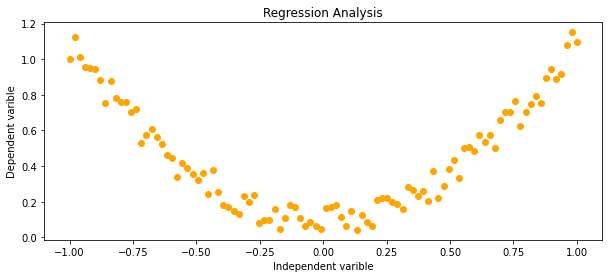

In [198]:
# view data
plt.figure(figsize=(10,4))
plt.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
plt.title('Regression Analysis')
plt.xlabel('Independent varible')
plt.ylabel('Dependent varible')
plt.show()

## Regression in these data

### Model 1

In [199]:
#define model 1
class Net(torch.nn.Module):
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()                          #n_feature = 1 (the ti of each yi)
        self.hidden = torch.nn.Linear(n_feature, n_hidden)   # hidden layer (n_hidden = neurons of hidden layer)
        self.predict = torch.nn.Linear(n_hidden, n_output)   # output layer (n_output=1, the correspoding yi of ti)

    def forward(self, x):
        x = F.relu(self.hidden(x))      # activation function for hidden layer
        x = self.predict(x)             # linear output
        return x

In [200]:
net = Net(n_feature=1, n_hidden=200, n_output=1)   #200 hidden neurons

In [201]:
optimizer = torch.optim.Adam(net.parameters(), lr=0.05)
loss_func = torch.nn.MSELoss()

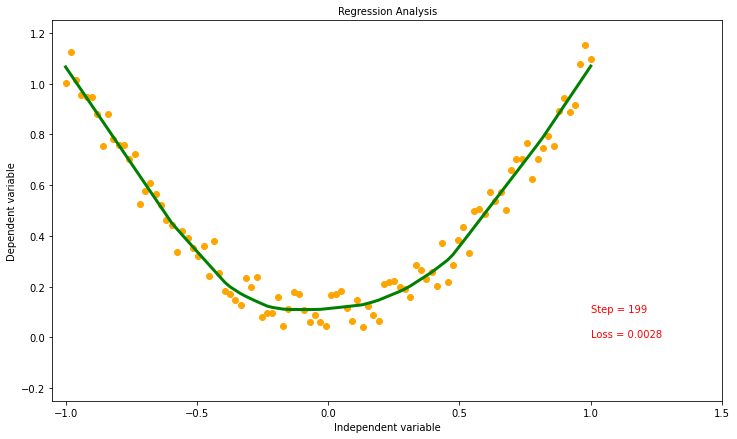

In [202]:
# train the network
EPOCHS = 200
epochs = EPOCHS

my_images = []
fig, ax = plt.subplots(figsize=(12,7))

for t in range(epochs):
  
    y_pred = net(x)     # input x and prediction of the model based on x

    loss = loss_func(y_pred, y)     # must be (1. nn output, 2. target)

    optimizer.zero_grad()   # clear gradients for next epoch
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    # plot and show learning 
    plt.cla()
    ax.set_title('Regression Analysis', fontsize=10)
    ax.set_xlabel('Independent variable', fontsize=10)
    ax.set_ylabel('Dependent variable', fontsize=10)
    ax.set_xlim(-1.05, 1.5)
    ax.set_ylim(-0.25, 1.25)
    ax.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
    ax.plot(x.data.numpy(), y_pred.data.numpy(), 'g-', lw=3)
    ax.text(1.0, 0.1, 'Step = %d' % t, fontdict={'size': 10, 'color':  'red'})
    ax.text(1.0, 0, 'Loss = %.4f' % loss.data.numpy(),
            fontdict={'size': 10, 'color':  'red'})


    fig.canvas.draw()       # draw the canvas
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    my_images.append(image)
    
   #save images as a gif    
imageio.mimsave('./curve_1.gif', my_images, fps=10)

## sine data
Try the same network (model 1) on some more complex data. This time a sine way with random noise.

## Problem definition
Suppose we have a time series P(t). P(t) is the solution of a differential equation $$ \frac{dP}{dt} = f(t,P(t))$$ We don't know the differential equation, nor the solution-time series P(t). We have some points (ti, pi) but not P(t). 

Let's suppose a simple example, P(t) = sint, which is solution of diff.eq P'(t) = cost. We pretend like we don't know P(t), just some points (ti,pi), specifically we have 100 points in (-10,10).

# First approach :
One first approach is to approximate P(t) with interpolation, for example a Neural Network. We can use also other models like splines. Neural Network is a continues function approximator with great results, for this reason is a good choice. 

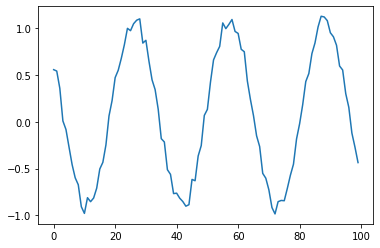

In [226]:
x = torch.unsqueeze(torch.linspace(-10, 10, 100), dim=1) 

y = torch.sin(x) + 0.2*torch.rand(x.size())  # noise
x, y = Variable(x), Variable(y)
plt.plot(y)

In [218]:
#we keep model 1 but with adam optimizer
optimizer = torch.optim.Adam(net.parameters(), lr=0.05)
loss_func = torch.nn.MSELoss()

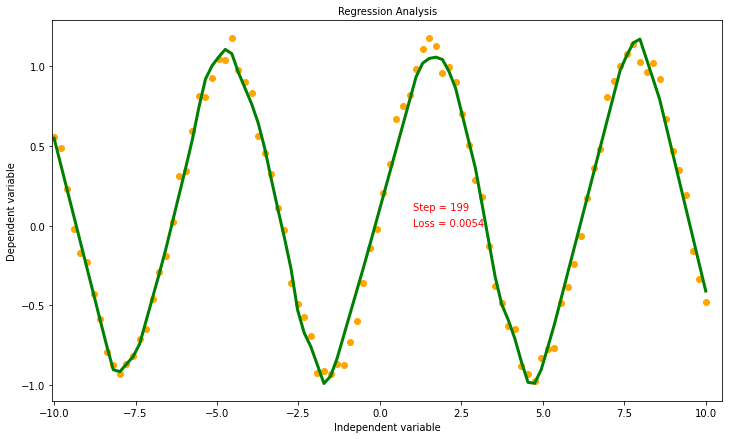

In [219]:
epochs = 200

my_images = []
fig, ax = plt.subplots(figsize=(12,7))
losses=[]
for t in range(epochs):
  
    y_pred = net(x)     # input x and predict based on x

    loss = loss_func(y_pred, y)     

    optimizer.zero_grad()   # clear gradients for next epoch
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    losses.append(loss)
    # plot and show learning process
    plt.cla()
    ax.set_title('Regression Analysis', fontsize=10)
    ax.set_xlabel('Independent variable', fontsize=10)
    ax.set_ylabel('Dependent variable', fontsize=10)
    ax.set_xlim(-10.05, 10.5)
    #ax.set_ylim(-0.25, 1.25)
    ax.scatter(x.data.numpy(), y.data.numpy(), color = "orange")
    ax.plot(x.data.numpy(), y_pred.data.numpy(), 'g-', lw=3)
    ax.text(1.0, 0.1, 'Step = %d' % t, fontdict={'size': 10, 'color':  'red'})
    ax.text(1.0, 0, 'Loss = %.4f' % loss.data.numpy(),
            fontdict={'size': 10, 'color':  'red'})

    fig.canvas.draw()       # draw the canvas
    image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
    image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

    my_images.append(image)
    
   #save images as a gif    
imageio.mimsave('./curve_1.gif', my_images, fps=10)

### It works good after 200 epochs!
model 2 is nn.Sequential with 200 neurons in hidden layer, it's the same with model 1 but written in other way:

In [227]:
#define model 2
net = torch.nn.Sequential(
        torch.nn.Linear(1, 200),
        torch.nn.LeakyReLU(),
        torch.nn.Linear(200, 1),
    )
optimizer = torch.optim.Adam(net.parameters(), lr=0.5)
loss_func = torch.nn.MSELoss() 

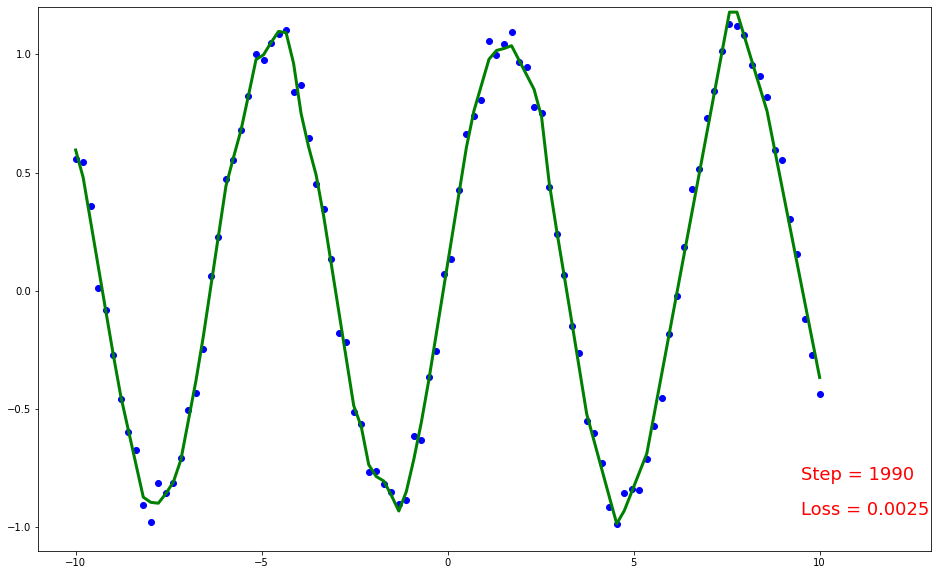

In [228]:
#training
my_images = []
fig, ax = plt.subplots(figsize=(16,10))

# start training
for t in range(2000):
  
    prediction = net(x)     # input x and predict based on x

    loss = loss_func(prediction, y)     

    optimizer.zero_grad()   # clear gradients for next train
    loss.backward()         # backpropagation, compute gradients
    optimizer.step()        # apply gradients
    
    if t % 10 == 0:
        # plot and show learning process
        plt.cla()
        ax.set_xlim(-11.0, 13.0)
        ax.set_ylim(-1.1, 1.2)
        ax.scatter(x.data.numpy(), y.data.numpy(), color = "blue")
        ax.plot(x.data.numpy(), prediction.data.numpy(), 'g-', lw=3)
        ax.text(9.50, -0.8, 'Step = %d' % t, fontdict={'size': 18, 'color':  'red'})
        ax.text(9.50, -0.95, 'Loss = %.4f' % loss.data.numpy(),
                fontdict={'size': 18, 'color':  'red'})

        # Used to return the plot as an image array 
        # (https://ndres.me/post/matplotlib-animated-gifs-easily/)
        fig.canvas.draw()       # draw the canvas, cache the renderer
        image = np.frombuffer(fig.canvas.tostring_rgb(), dtype='uint8')
        image  = image.reshape(fig.canvas.get_width_height()[::-1] + (3,))

        my_images.append(image)
    
    


# save images as a gif    
imageio.mimsave('./curve_2_bignet.gif', my_images, fps=10)

even better!

### Make predictions

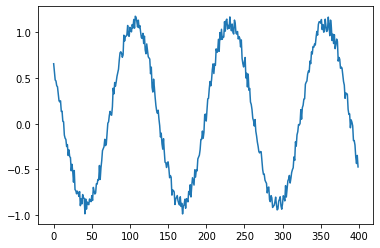

In [229]:
x = torch.unsqueeze(torch.linspace(-10, 10, 400), dim=1) 

y = torch.sin(x) + 0.2*torch.rand(x.size())  
x, y = Variable(x), Variable(y)
plt.plot(y)

In [230]:
pred = net(x)

In [231]:
loss = loss_func(pred, y)
loss

tensor(0.0055, grad_fn=<MseLossBackward>)

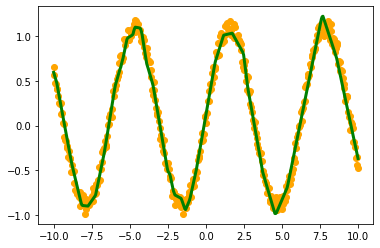

In [232]:
fig, ax = plt.subplots()
ax.scatter(x.data.numpy(),y.data.numpy(), color = "orange")
ax.plot(x.data.numpy(), pred.data.numpy(), 'g-', lw=3)

We can see that we trained the model in 100 points with t in T=(-10,10) and it works very good also for 400 points in T. We have now an approximator of time series P(t). Although, if we try the model out of T, we see that it works good for data in T, but it's very bad for data out of T! So, it is not reliable for future predictions of time t:

tensor(0.1594, grad_fn=<MseLossBackward>)


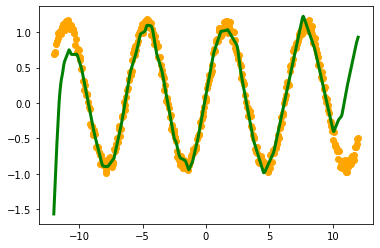

In [245]:
x = torch.unsqueeze(torch.linspace(-12, 12, 400), dim=1) #OUT OF T, FOR EXAMPLE (-12,12)
y = torch.sin(x) + 0.2*torch.rand(x.size())  
pred = net(x)
loss = loss_func(pred, y)
print(loss)
fig, ax = plt.subplots()
ax.scatter(x.data.numpy(),y.data.numpy(), color = "orange")
ax.plot(x.data.numpy(), pred.data.numpy(), 'g-', lw=3)

# Second approach:
One second approach is to use the approximation of P(t) that we found(i.e the avove Neural Network), so P(t) = N(t). Also,
1. As we said, Neural Network is a continues approximator, so we can have the derivative $\frac{dN}{dt}$
2. P(t) = N(t) is the solution of a diff. eq. $$\frac{dP}{dt} = f(t,P(t))$$ which we don't know.
3. suppose $$\frac{dP}{dt} = N1(t) * N(t)$$ where N1(t) is an other Neural Network that we have to train.
4. We want to minimize the loss function $$ E= \frac{1}{2}[\frac{dN}{dt} - N1(t)N(t)]^{2} $$ 
